### LIMPIEZA DE DATOS - TAREA 1

In [7]:
import pandas as pd
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context # Para que la URL del archivo cvs funcione en mac
ruta = "https://raw.githubusercontent.com/lbtriana/Proyecto_Bicicletas/main/SeoulBikeData_utf8.csv" #ruta desde url
df = pd.read_csv(ruta)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [8]:
# Modificar variables
df['fecha'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['day'] = df['fecha'].dt.day
df['month'] = df['fecha'].dt.month
df['year'] = df['fecha'].dt.year
df['day_of_week'] = df['fecha'].dt.dayofweek
df['functioning_day'] = df['Functioning Day'].replace({'Yes': 1, 'No': 0})
df['is_holiday'] = df['Holiday'].replace({'Holiday': 1, 'No Holiday': 0})
pd.set_option('future.no_silent_downcasting', True) # Esta linea es para evitar un warning de perder demasiada info al hacer downcasting
df['Hour_PM'] = np.where(df['Hour'] >= 12, 1, 0) #1 si es hora en la tarde 
df['Hour_lab'] = np.where((df['Hour'] >= 8) & (df['Hour'] <= 17), 1, 0) #1 si es horario laboral

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   object        
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

print(df.dtypes)

df.info()



Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
fecha                       0
day                         0
month                       0
year                        0
day_of_week                 0
functioning_day             0
is_holiday                  0
Hour_PM                     0
Hour_lab                    0
dtype: int64
Date                                object
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     in

### EXPLORACION DE DATOS - TAREA 2

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,Functioning Day,fecha,day,month,year,day_of_week,functioning_day,is_holiday,Hour_PM,Hour_lab
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Yes,2017-12-01,1,12,2017,4,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Yes,2017-12-01,1,12,2017,4,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Yes,2017-12-01,1,12,2017,4,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Yes,2017-12-01,1,12,2017,4,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Yes,2017-12-01,1,12,2017,4,1,0,0,0


In [11]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),fecha,day,month,year,day_of_week,Hour_PM,Hour_lab
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2018-05-31 23:59:59.999999744,15.720548,6.526027,2017.915068,3.002740,0.500000,0.416667
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017-12-01 00:00:00,1.000000,1.000000,2017.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018-03-02 00:00:00,8.000000,4.000000,2018.000000,1.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018-06-01 00:00:00,16.000000,7.000000,2018.000000,3.000000,0.500000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018-08-31 00:00:00,23.000000,10.000000,2018.000000,5.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018-11-30 00:00:00,31.000000,12.000000,2018.000000,6.000000,1.000000,1.000000
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,8.796749,3.448048,0.278796,1.998056,0.500029,0.493035


# Box plot de variables para identificar outliers

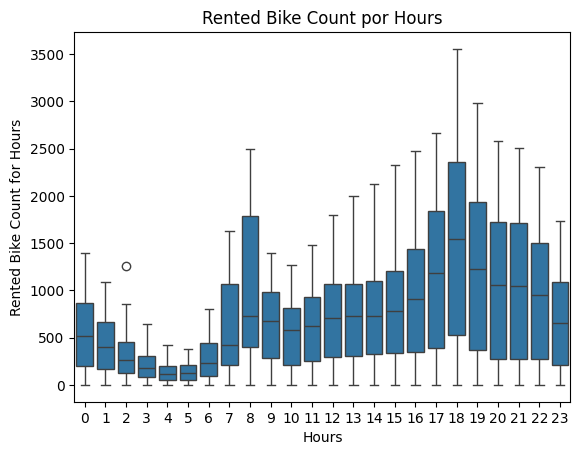

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hour x Rented Bike Count
sns.boxplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por Hours')
plt.xlabel('Hours')
plt.ylabel('Rented Bike Count for Hours')
plt.show()


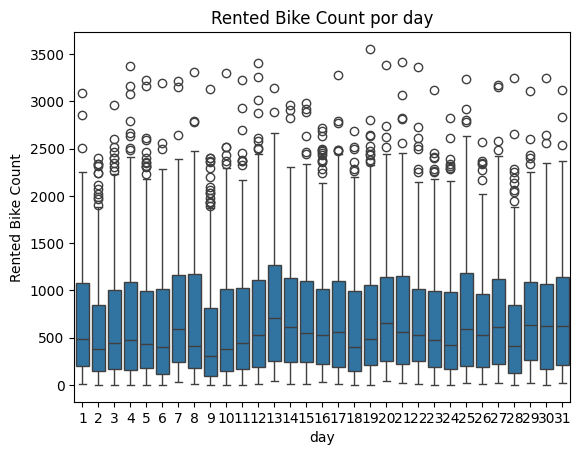

In [13]:
# Day x Rented Bike Count
sns.boxplot(x='day', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por day')
plt.xlabel('day')
plt.ylabel('Rented Bike Count')
plt.show()

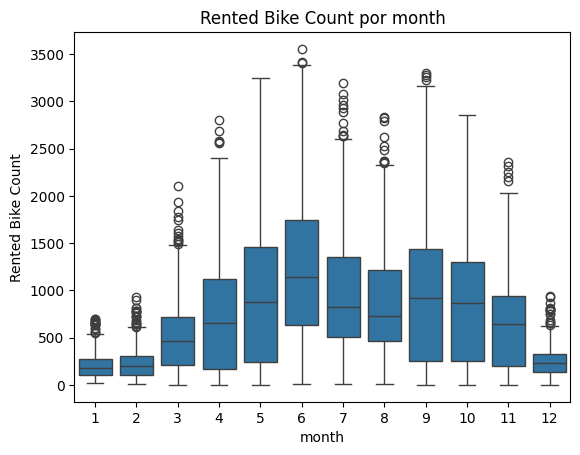

In [14]:
# Month x Rented Bike Count
sns.boxplot(x='month', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por month')
plt.xlabel('month')
plt.ylabel('Rented Bike Count')
plt.show()

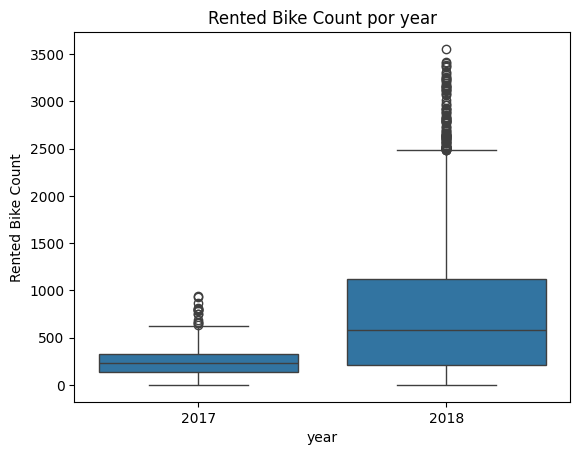

In [15]:
# Year x Rented Bike Count
sns.boxplot(x='year', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por year')
plt.xlabel('year')
plt.ylabel('Rented Bike Count')
plt.show()

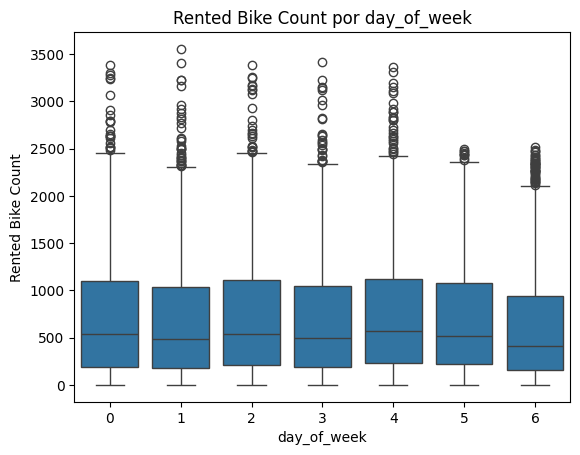

In [16]:
# Day_of_week x Rented Bike Count
sns.boxplot(x='day_of_week', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('Rented Bike Count')
plt.show()

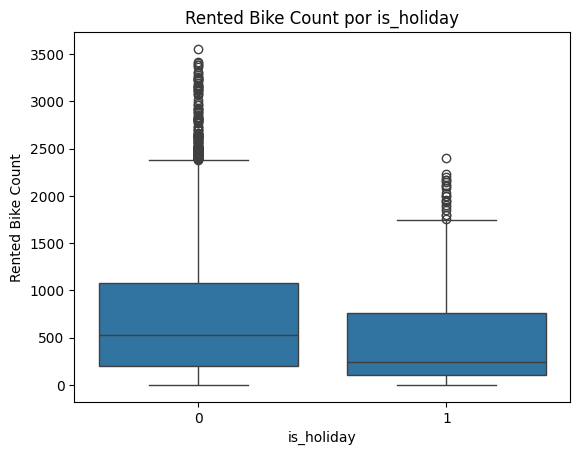

In [17]:
# Is_holiday x Rented Bike Count
sns.boxplot(x='is_holiday', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por is_holiday')
plt.xlabel('is_holiday')
plt.ylabel('Rented Bike Count')
plt.show()

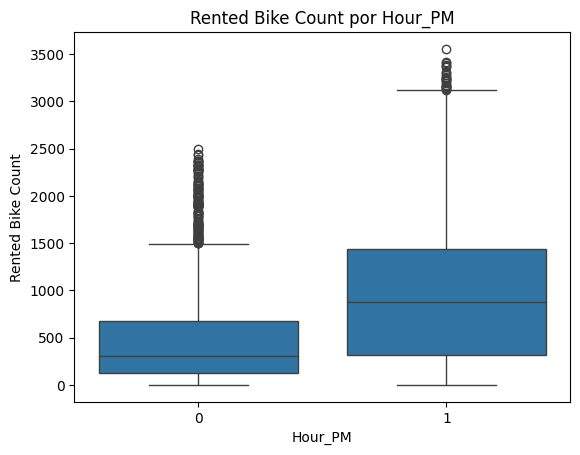

In [18]:
# Hour_PM x Rented Bike Count
sns.boxplot(x='Hour_PM', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por Hour_PM')
plt.xlabel('Hour_PM')
plt.ylabel('Rented Bike Count')
plt.show()

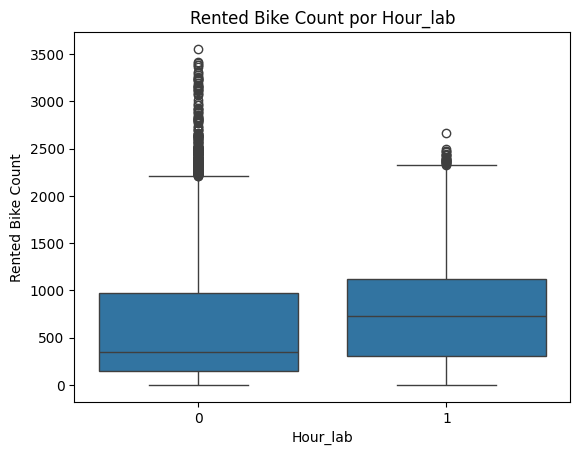

In [19]:
# Hour_lab x Rented Bike Count
sns.boxplot(x='Hour_lab', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por Hour_lab')
plt.xlabel('Hour_lab')
plt.ylabel('Rented Bike Count')
plt.show()

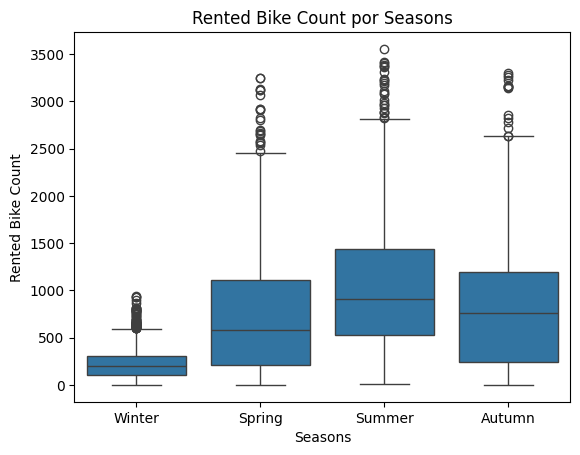

In [20]:
#Seasons x Rented Bike Count
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count por Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()

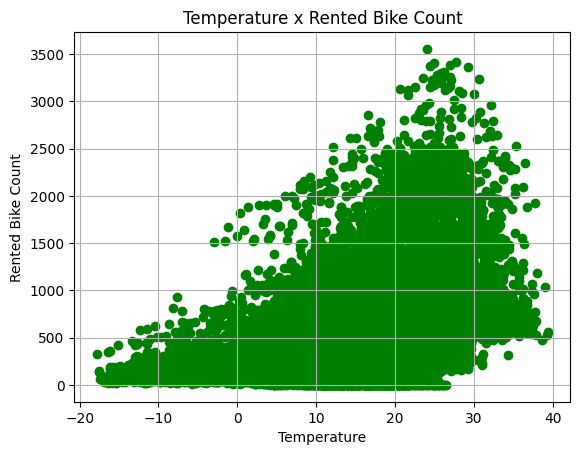

In [21]:
#Temperature x Rented Bike Count
plt.scatter(df['Temperature(C)'], df['Rented Bike Count'], color='green')
plt.title('Temperature x Rented Bike Count')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

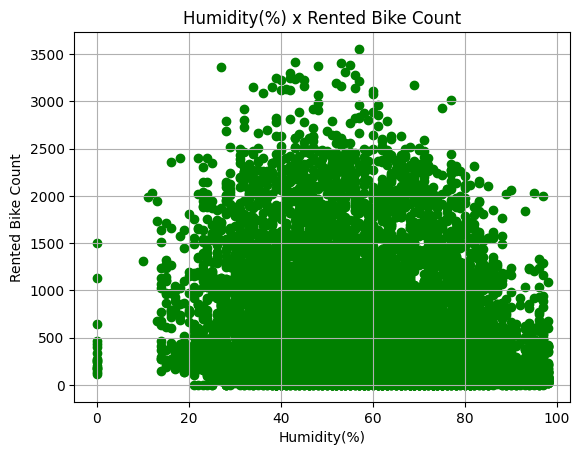

In [22]:
#Humidity(%) x Rented Bike Count
plt.scatter(df['Humidity(%)'], df['Rented Bike Count'], color='green')
plt.title('Humidity(%) x Rented Bike Count')
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

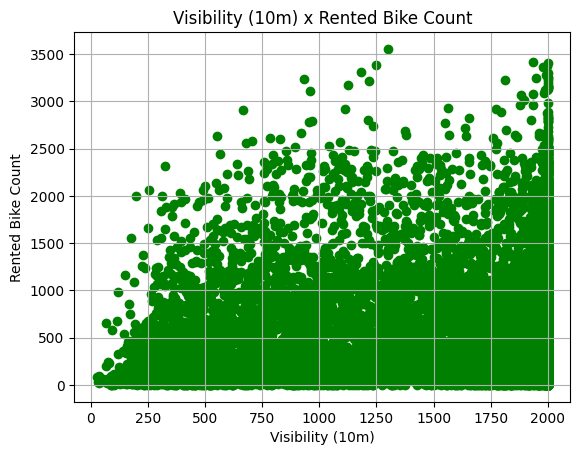

In [23]:
#Visibility (10m) x Rented Bike Count
plt.scatter(df['Visibility (10m)'], df['Rented Bike Count'], color='green')
plt.title('Visibility (10m) x Rented Bike Count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

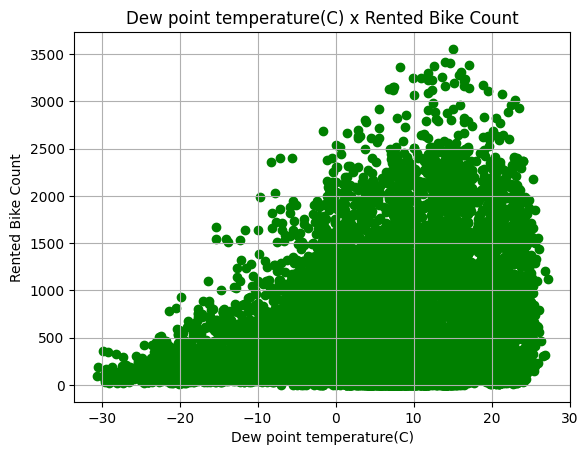

In [24]:
#Dew point temperature(C) x Rented Bike Count
plt.scatter(df['Dew point temperature(C)'], df['Rented Bike Count'], color='green')
plt.title('Dew point temperature(C) x Rented Bike Count')
plt.xlabel('Dew point temperature(C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

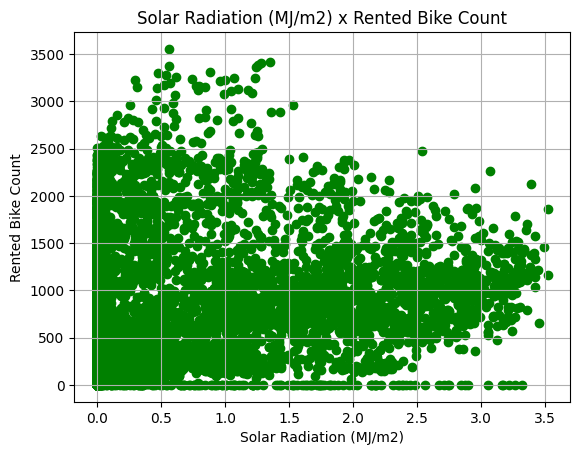

In [25]:
#Solar Radiation (MJ/m2) x Rented Bike Count
plt.scatter(df['Solar Radiation (MJ/m2)'], df['Rented Bike Count'], color='green')
plt.title('Solar Radiation (MJ/m2) x Rented Bike Count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

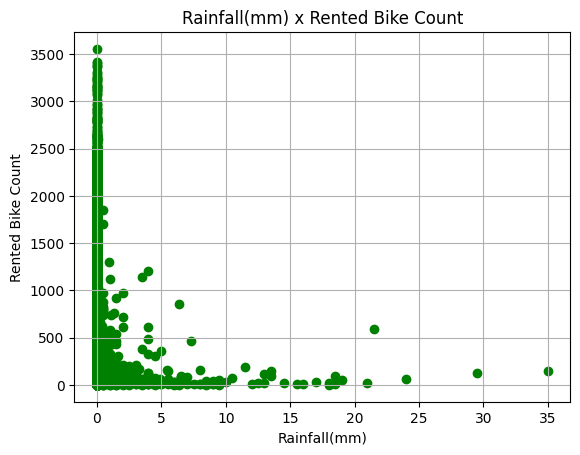

In [26]:
#Rainfall(mm) x Rented Bike Count
plt.scatter(df['Rainfall(mm)'], df['Rented Bike Count'], color='green')
plt.title('Rainfall(mm) x Rented Bike Count')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

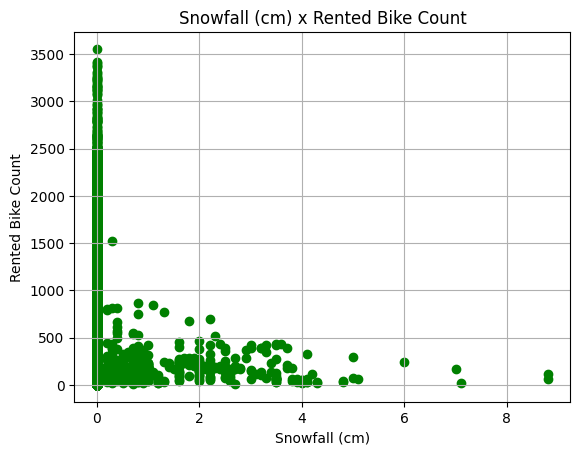

In [27]:
  #Snowfall (cm) x Rented Bike Count
plt.scatter(df['Snowfall (cm)'], df['Rented Bike Count'], color='green')
plt.title('Snowfall (cm) x Rented Bike Count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

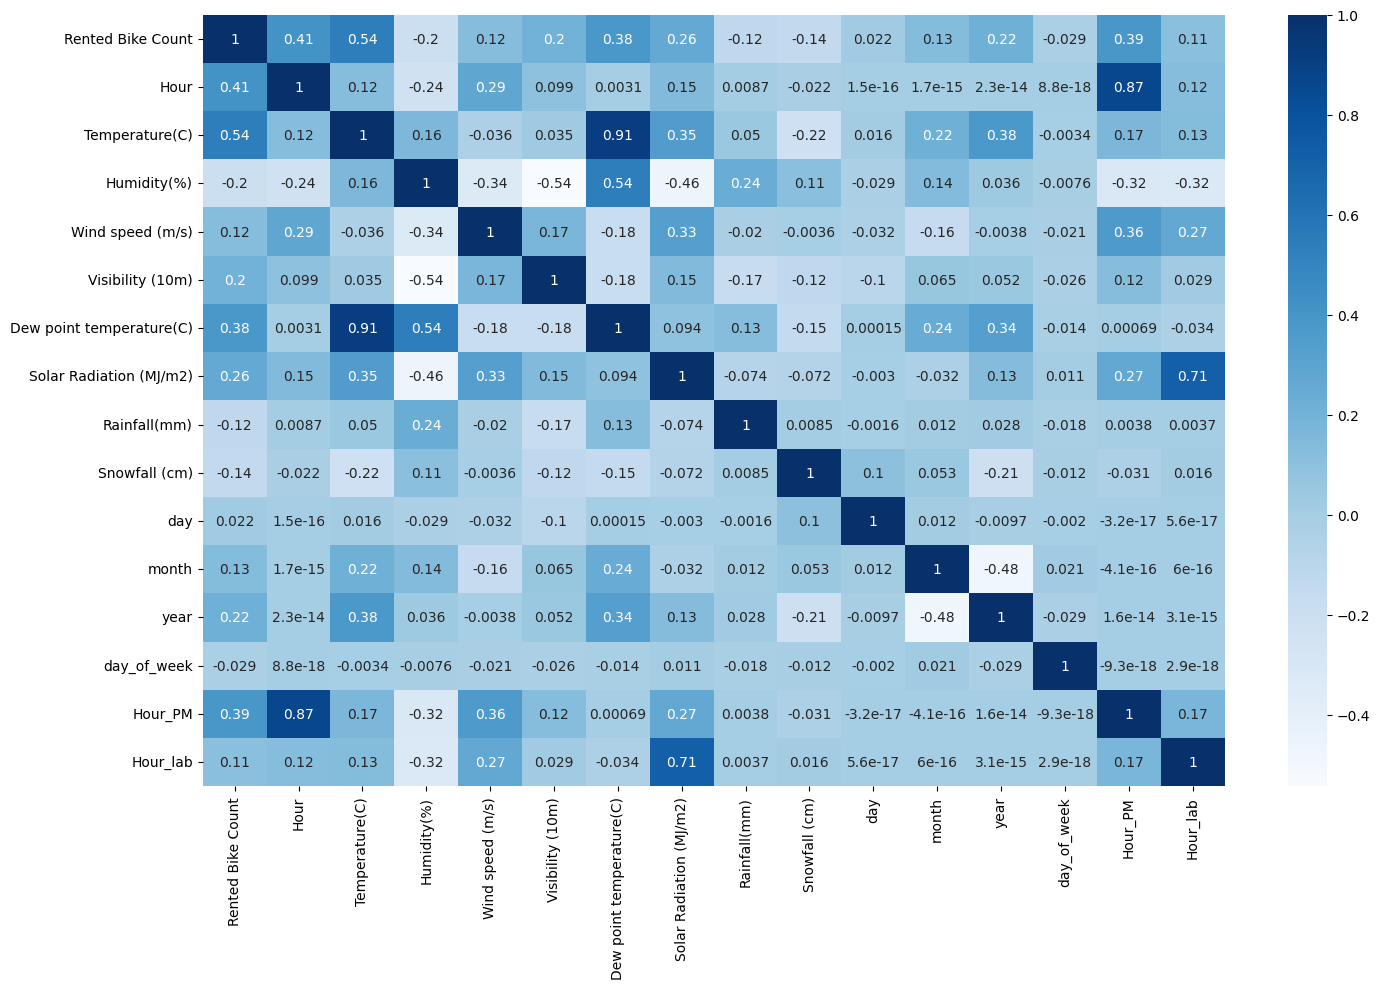

In [28]:
#Matriz de correlación
df_subconjunto = df.select_dtypes(include=[np.number])
corr = df_subconjunto.corr()
plt.figure(figsize=(15, 10)) 
sns.heatmap(corr, cmap="Blues", annot=True)
plt.tight_layout()

In [29]:
df.dtypes

Date                                object
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
fecha                       datetime64[ns]
day                                  int32
month                                int32
year                                 int32
day_of_week                          int32
functioning_day                     object
is_holiday                          object
Hour_PM                              int64
Hour_lab                             int64
dtype: obje

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

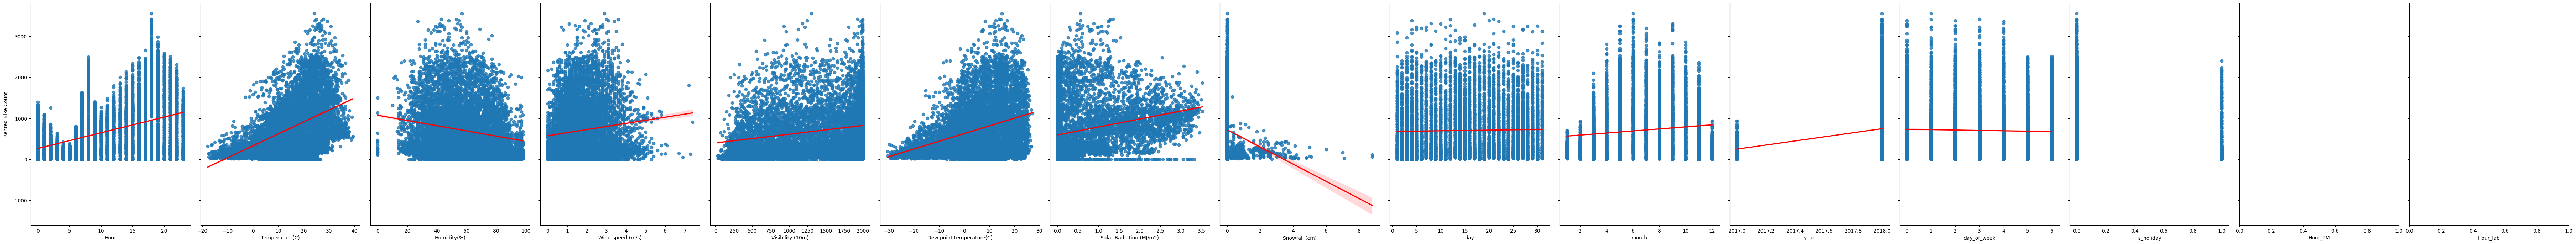

In [32]:
#Gráficas de regresión entre condiciones ambientales y la renta de bicicletas
sns.pairplot(df, x_vars=["Hour", "Temperature(C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(C)", "Solar Radiation (MJ/m2)", "Snowfall (cm)", "day", "month", "year", "day_of_week", "is_holiday", "Hour_PM", "Hour_lab"], y_vars="Rented Bike Count", height=7, aspect=0.7, kind='reg', plot_kws={'line_kws': {'color': 'red'}})
plt.tight_layout()
plt.show()

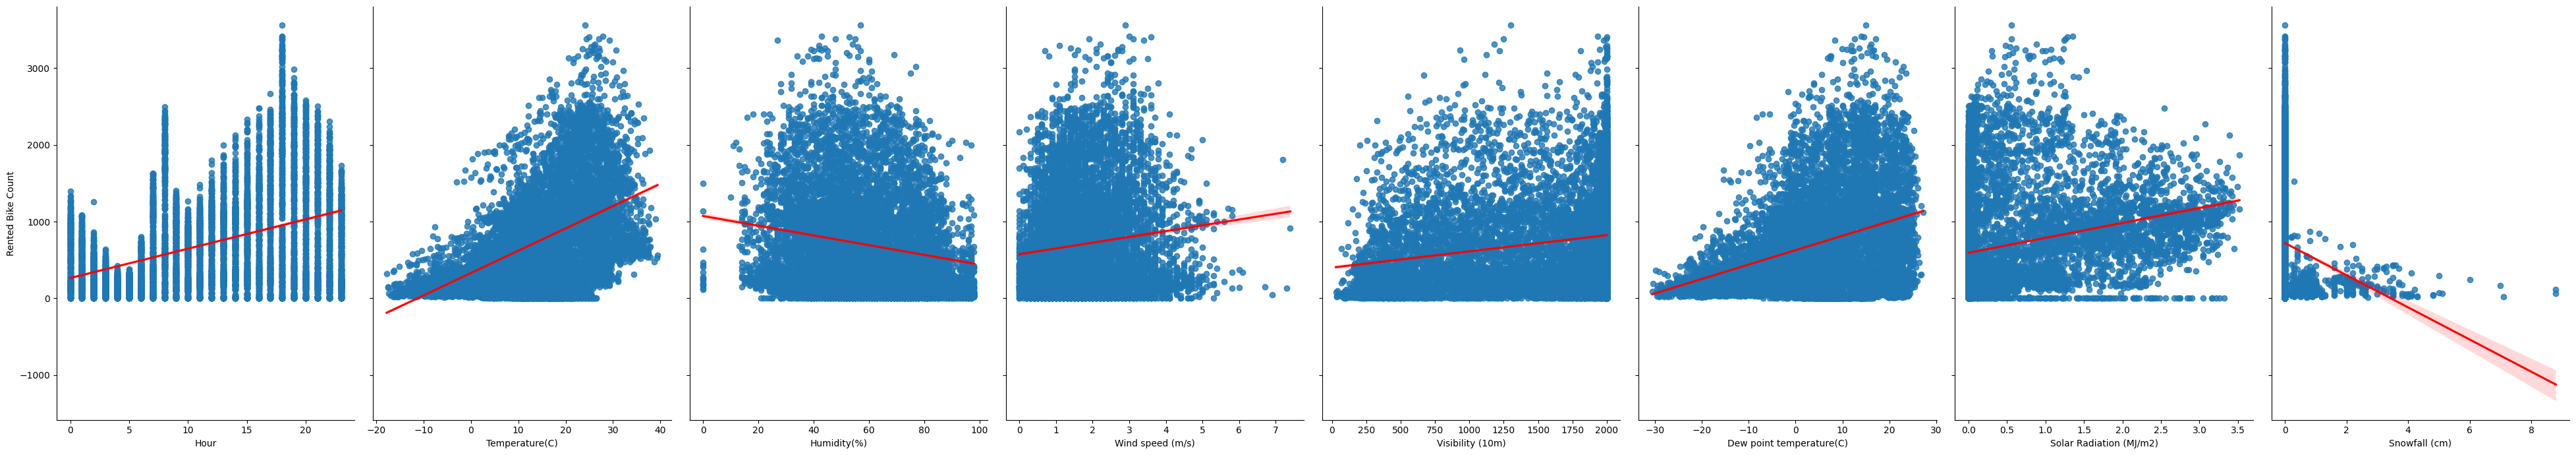

In [34]:
#Gráficas de regresión entre condiciones ambientales y la renta de bicicletas
sns.pairplot(df, x_vars=["Hour", "Temperature(C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(C)", "Solar Radiation (MJ/m2)", "Snowfall (cm)"], y_vars="Rented Bike Count", height=7, aspect=0.7, kind='reg', plot_kws={'line_kws': {'color': 'red'}})
plt.tight_layout()
plt.show()